In [29]:
import os
import pandas as pd

In [30]:
path = r"D:\binary-classification-mlops\data\raw\cereal.csv"
df = pd.read_csv(path)
df.shape

(77, 16)

In [31]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [32]:
df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


In [33]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [36]:
df['name']

0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object

In [37]:
import re

def clean_cereal_name(name: str) -> str:
    if not isinstance(name, str):
        return name

    name = name.lower()
    name = name.strip()
    name = name.replace("-", " ")
    name = re.sub(r"[^a-z0-9\s]", "", name)   # remove special chars
    name = re.sub(r"\s+", " ", name)          # collapse spaces

    return name

df["name"] = df["name"].apply(clean_cereal_name)

In [38]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100 bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100 natural bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,all bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,all bran with extra fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,almond delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [39]:
num_cols = [
    "calories","protein","fat","sodium","fiber",
    "carbo","sugars","potass","vitamins","weight","cups"
]

(df[num_cols] < 0).sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
dtype: int64

In [40]:
df[num_cols] = df[num_cols].mask(df[num_cols] < 0, pd.NA)
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))
(df[num_cols] < 0).sum()
df[num_cols].isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
weight      0
cups        0
dtype: int64

In [41]:
def health_class(row):
    if row["fiber"] >= 7 and row["sugars"] <= 5 and row["calories"] <= 110:
        return 2   # Healthy
    elif row["fiber"] >= 3 and row["sugars"] <= 10:
        return 1   # Moderately healthy
    else:
        return 0   # Unhealthy

df["target"] = df.apply(health_class, axis=1)

In [42]:
df["target"].value_counts()
df["target"].value_counts(normalize=True)

target
0    0.740260
1    0.233766
2    0.025974
Name: proportion, dtype: float64

In [43]:
df[num_cols].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.798701,7.025974,98.441558,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.881688,4.349755,69.491857,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


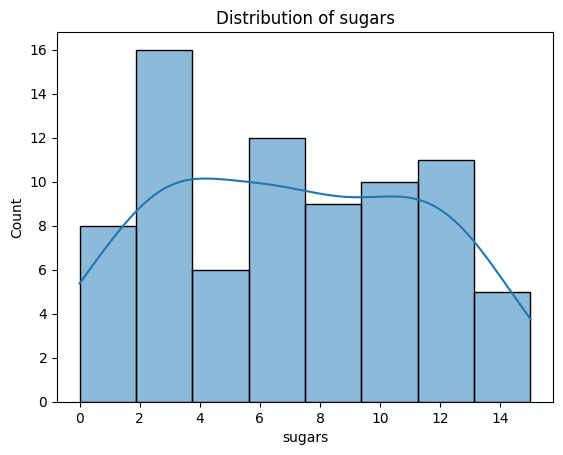

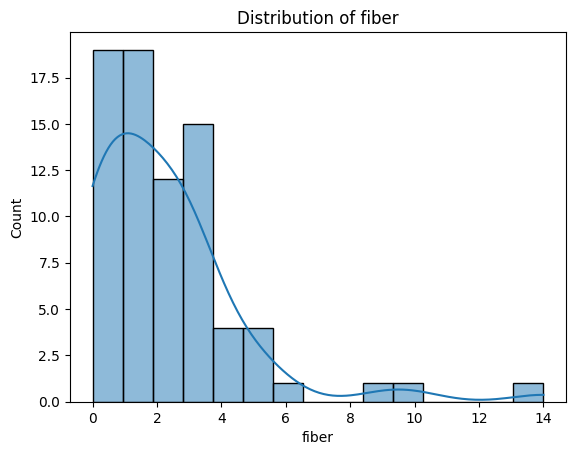

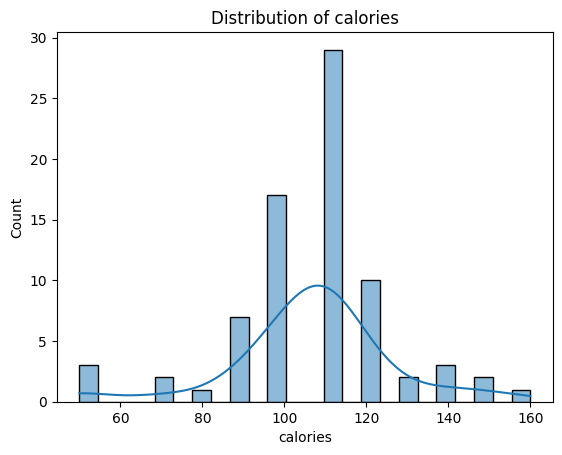

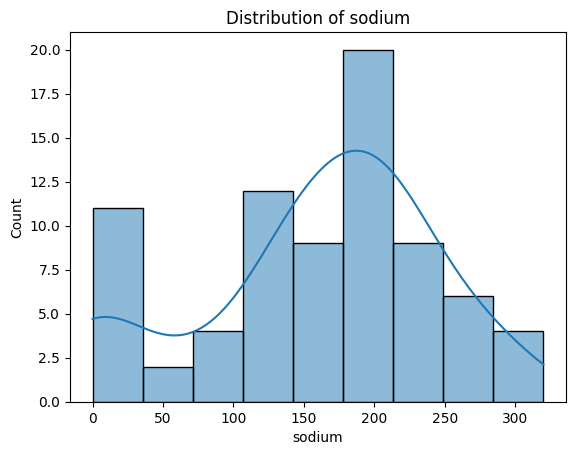

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ["sugars", "fiber", "calories", "sodium"]:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

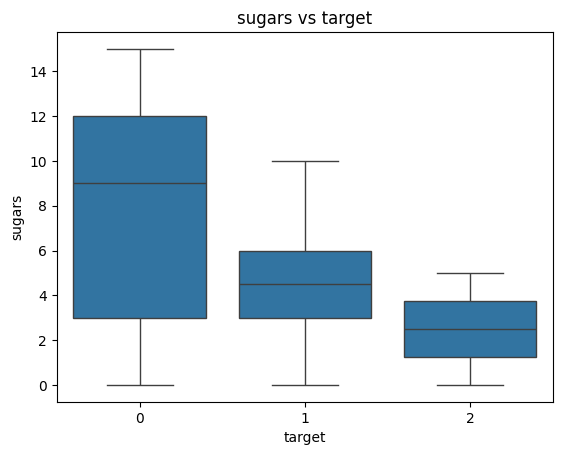

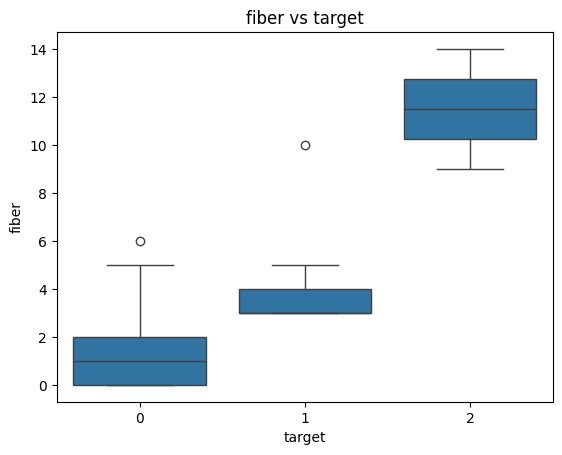

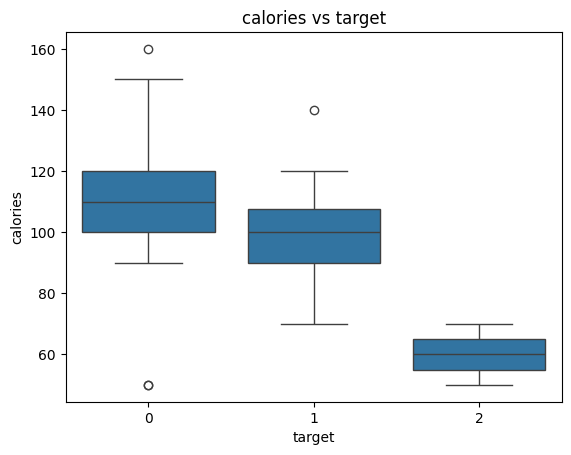

In [45]:
for col in ["sugars", "fiber", "calories"]:
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} vs target")
    plt.show()

In [46]:
pd.crosstab(df["mfr"], df["target"], normalize="index")

target,0,1,2
mfr,,,
A,1.000000,0.000000,0.000000
G,0.909091,0.090909,0.000000
K,0.739130,0.173913,0.086957
N,0.166667,0.833333,0.000000
P,0.444444,0.555556,0.000000
Q,1.000000,0.000000,0.000000
R,0.750000,0.250000,0.000000


In [47]:
pd.crosstab(df["shelf"], df["target"], normalize="index")

target,0,1,2
shelf,,,
1,0.700000,0.300000,0.000000
2,0.904762,0.095238,0.000000
3,0.666667,0.277778,0.055556


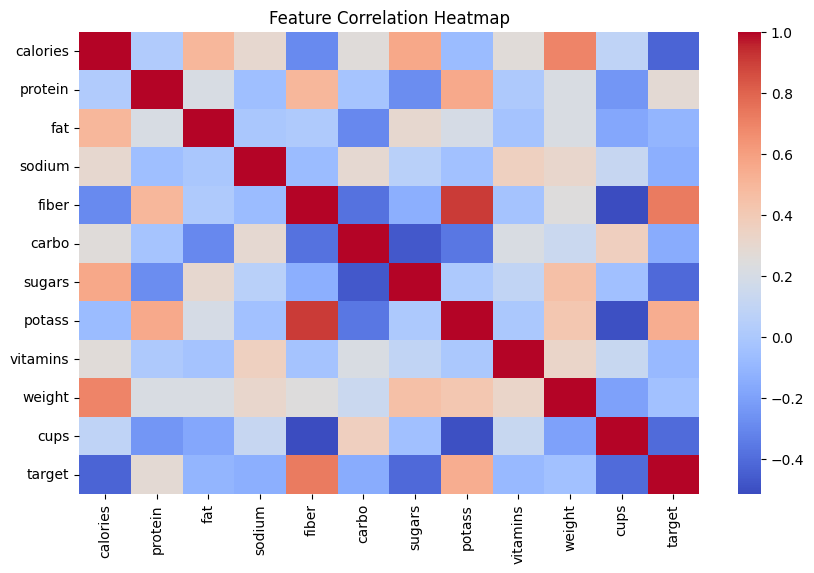

In [48]:
corr = df[num_cols + ["target"]].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [49]:
DROP_COLS = ["name", "rating"]  # name = identifier, rating = leakage if used in any way
df_model = df.drop(columns=DROP_COLS)

In [50]:
X = df_model.drop(columns=["target"])
y = df_model["target"]

In [51]:
cat_features = ["mfr", "type", "shelf"]

num_features = [c for c in X.columns if c not in cat_features]
print("Categorical:", cat_features)
print("Numerical:", num_features)

Categorical: ['mfr', 'type', 'shelf']
Numerical: ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 target
0    0.737705
1    0.229508
2    0.032787
Name: proportion, dtype: float64
Test class distribution:
 target
0    0.75
1    0.25
Name: proportion, dtype: float64


In [53]:
# preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # safe even if no missing
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features)
    ],
    remainder="drop"
)

In [55]:
preprocessor.fit(X_train)

ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
cat_ohe_features = ohe.get_feature_names_out(cat_features)

all_features = list(num_features) + list(cat_ohe_features)
print("Total features after encoding:", len(all_features))

Total features after encoding: 23


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the full modeling pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=100))
])

# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['calories', 'protein', 'fat',
                                                   'sodium', 'fiber', 'carbo',
                                                   'sugars', 'potass',
                                                   'vitamins', 'weight',
                                                   'cups']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['mfr', 'type', 'shelf'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



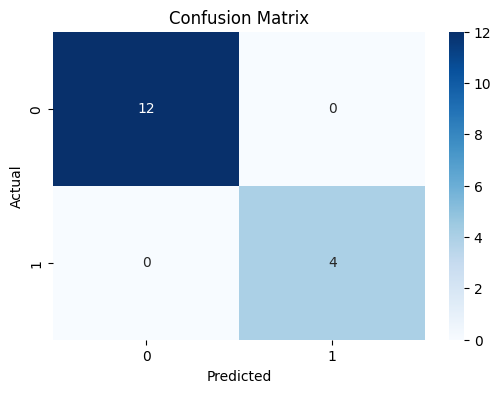

In [57]:
# Predictions
y_pred = model_pipeline.predict(X_test)

# Results
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()